In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:


#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movie/oldmoviedataset.csv',encoding='ISO-8859-1')

MessageError: ignored

In [ ]:
data.head()

Title  Year    Genres          Genres_Types Certificate  Runtime_in_mins  \
0       96  2018      love  Comedy, Crime, Drama         U/A              158   
1      143  2017      love               Romance           U              117   
2      465  2017    Horror                Horror         U/A              106   
3    54321  2016  Thriller              Thriller           A              120   
4  1:00 AM  2017    Horror                Horror           U               87   

        Theme_Strategy                                            Cast  \
0  current trend story                   Ram\nMysskin\nPoorna\nAshvatt   
1  current trend story  Rishi, Priyanka Sharma, Vijayakumar, Mahadevan   
2        Extreme story                          Karthik Raj, Niranjana   
3  current trend story         Shabeer, Aarvin, Pavithra Gowda, Rohini   
4        Extreme story                                 Mohan, Sasvatha   

           Directors                         Studio ReleaseDate  \
0         Prem Kumar             Madras Enterprises  02-09-2018   
1    Rishi Gangadhar                    Eye Talkies  11-10-2017   
2        Sai Sathyam                      LPS Films  24-03-2017   
3  Ragavendra Prasad         MainStream Productions  26-08-2016   
4              Rahul  RPM Cinemas & MPM Productions  06-12-2017   

   Budget_in_crores  Box_office_in_crores  Rating      Verdict  No_of_Votes  
0              15.0                  55.0     8.2  Blockbuster      2343110  
1              21.0                  23.0     4.8      average      1620367  
2              20.0                  12.0     3.4         Flop        23032  
3              17.0                  16.0     5.9      average      1129952  
4              20.0                  13.0     3.8         Flop        68984

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Title                 697 non-null    object 
 1   Year                  697 non-null    int64  
 2   Genres                697 non-null    object 
 3   Genres_Types          697 non-null    object 
 4   Certificate           697 non-null    object 
 5   Runtime_in_mins       697 non-null    int64  
 6   Theme_Strategy        690 non-null    object 
 7   Cast                  697 non-null    object 
 8   Directors             697 non-null    object 
 9   Studio                697 non-null    object 
 10  ReleaseDate           697 non-null    object 
 11  Budget_in_crores      691 non-null    float64
 12  Box_office_in_crores  691 non-null    float64
 13  Rating                691 non-null    float64
 14  Verdict               691 non-null    object 
 15  No_of_Votes           6

In [ ]:
data.isnull().sum()

Title                   0
Year                    0
Genres                  0
Genres_Types            0
Certificate             0
Runtime_in_mins         0
Theme_Strategy          7
Cast                    0
Directors               0
Studio                  0
ReleaseDate             0
Budget_in_crores        6
Box_office_in_crores    6
Rating                  6
Verdict                 6
No_of_Votes             0
dtype: int64

In [ ]:
data['Rating'].fillna(data['Rating'].median(),inplace=True)
data['Budget_in_crores'].fillna(data['Budget_in_crores'].median(),inplace=True)
data['Box_office_in_crores'].fillna(data['Box_office_in_crores'].median(),inplace=True)
data['Verdict'].fillna(data['Verdict'].mode().iloc[0],inplace=True)
data['Theme_Strategy'].fillna(data['Theme_Strategy'].mode().iloc[0],inplace=True)


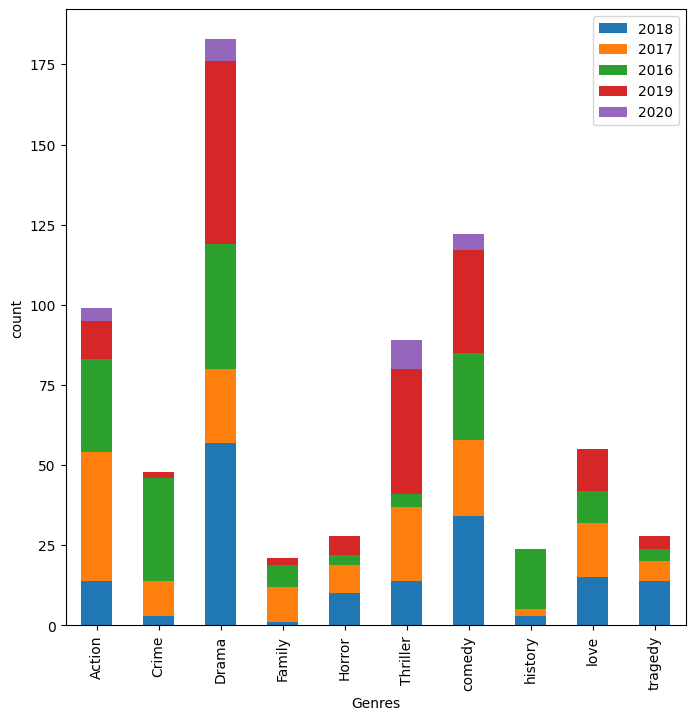

In [ ]:
df =data[['Genres', 'Year']].groupby(['Genres', 'Year']).size().reset_index()
a= df.set_index(['Genres', 'Year']).unstack(level=1).plot(kind='bar', stacked=True, figsize=(8,8))
a.set_xlabel('Genres', fontsize=10)
a.set_ylabel('count', fontsize=10)
a.legend(data['Year'].unique())
plt.show()

<Axes: xlabel='Verdict', ylabel='count'>

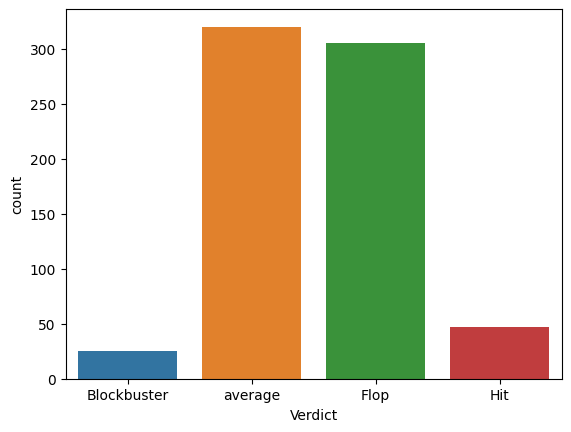

In [ ]:
sns.countplot(x="Verdict", data=data)

<Axes: xlabel='Certificate', ylabel='count'>

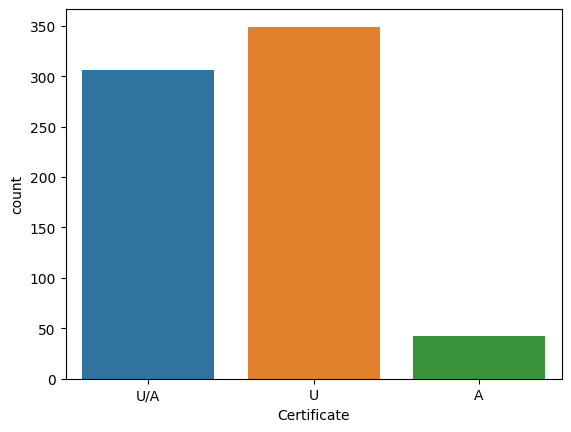

In [ ]:
sns.countplot(x="Certificate", data=data)

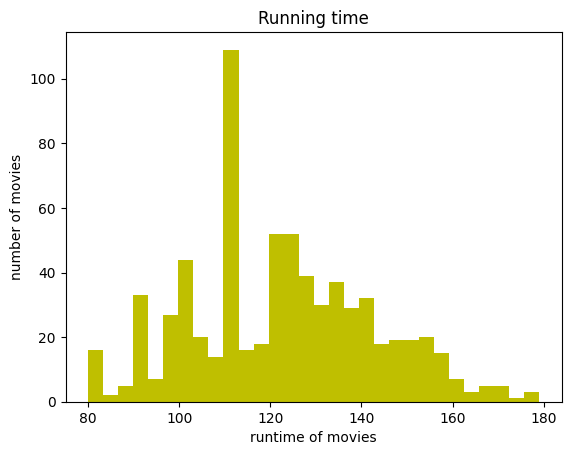

In [ ]:
plt.title("Running time")
plt.xlabel("runtime of movies")
plt.ylabel("number of movies")
plt.hist(data["Runtime_in_mins"],bins= 30,color="y" )
plt.show()

In [ ]:
result=data[(data.Genres =='Action')&(data.Verdict =='Hit')]
result

Title  Year  Genres                    Genres_Types  \
105  Chekka Chivantha Vaanam  2018  Action              Action, Drama, War   
275                Kathakali  2016  Action                Action, Thriller   
282                    Kavan  2017  Action         Action, Drama, Thriller   
345                  Marudhu  2016  Action                   Action, Drama   
373                 Mr.Local  2019  Action  Action, Comedy, Drama, Romance   
390      Namma Veettu Pillai  2019  Action           Action, Comedy, Drama   
412                      NGK  2019  Action                   Action, Drama   
479             Pichaikkaran  2016  Action         Action, Drama, Thriller   
552               Sethupathi  2016  Action         Action, Crime, Thriller   
561                 Singam 3  2017  Action         Action, Crime, Thriller   
682                  Vivegam  2017  Action                Action, Thriller   

    Certificate  Runtime_in_mins        Theme_Strategy  \
105         U/A              110  People reality story   
275           U              125  People reality story   
282           U              150  People reality story   
345         U/A              146  People reality story   
373           U              155      Live information   
390           U              153  People reality story   
412           U              148     Imagination story   
479           U              130      Live information   
552           U              122   current trend story   
561           U              155   current trend story   
682         U/A              149  People reality story   

                                                  Cast         Directors  \
105            Starring Chandan Kumar\nAishwarya Arjun       Mani Ratnam   
275                            Vishal, Catherine Tresa          Pandiraj   
282  Vijay Sethupathi, Madonna Sebastian, T. Rajend...        K.V. Anand   
345                                  Vishal, Sri Divya       M. Muthaiah   
373                                       Vimal\nOviya         M. Rajesh   
390   Yogi Babu\nElyssa Erhardt\nAnandaraj\nCharle\...          Pandiraj   
412   Praveen Raja\nRajesh Giriprasad\nVasant Marim...  K. Selvaraghavan   
479                          Vijay Antony, Satna Titus              Sasi   
552                  Vijay Sethupathi, Remya Nambeesan   S.U. Arun Kumar   
561  Suriya, Shruti Haasan, Anushka Shetty, Thakur ...              Hari   
682  Ajith Kumar, Kajal Aggarwal, Vivek Oberoi, Aks...              Siva   

                                        Studio ReleaseDate  Budget_in_crores  \
105           Lyca Productions, Madras Talkies  02-09-2018             35.00   
275  Pasanga Productions & Vishal Film Factory  14-01-2016             19.00   
282                          AGS Entertainment  30-03-2017             18.76   
345                         Anna Gopuram Films  20-05-2016             15.61   
373                          Libra Productions  03-05-2019              9.00   
390                       Muthuvinayaka Movies  26-09-2019             12.00   
412                      Sri Senthoor Pictures  31-05-2019             35.00   
479              Vijay Antony Film Corporation  03-04-2016             10.00   
552                              Vansan Movies  19-02-2016              8.00   
561                               Studio Green  01-09-2017             45.00   
682                        Sathya Jyothi Films  24-08-2017            105.00   

     Box_office_in_crores  Rating Verdict  No_of_Votes  
105                 92.50     7.0     Hit        59056  
275                 30.00     6.6     Hit       693827  
282                 23.13     7.0     Hit        40081  
345                 25.00     6.0     Hit        79200  
373                  8.00     6.0     Hit       176151  
390                 11.20     6.0     Hit        27721  
412                 47.00     6.0     Hit        32195  
479                 33.00     7.0     Hit       659763  
55

In [ ]:
result=data[(data.Genres =='Drama')&(data.Verdict =='Hit')]
result

Title  Year Genres   Genres_Types Certificate  \
16         Aandavan Kattalai  2016  Drama          Drama           U   
31                   Adhiran  2016  Drama          Drama           U   
58                     Aramm  2017  Drama          Drama           U   
62                     Aruvi  2017  Drama          Drama         U/A   
122             Dharma Durai  2016  Drama          Drama           U   
194            Irudhi Suttru  2016  Drama   Sport, Drama           U   
329           Magalir Mattum  2017  Drama          Drama           U   
449                    Pakka  2018  Drama          Drama         U/A   
477                    Petta  2019  Drama  Action, Drama         U/A   
666  Vennila Kabaddi Kuzhu 2  2019  Drama  Action, Drama           U   

     Runtime_in_mins        Theme_Strategy  \
16               151  People reality story   
31               125  People reality story   
58               119  People reality story   
62               130  People reality story   
122              147  People reality story   
194              109  People reality story   
329              140  People reality story   
449               93  People reality story   
477              171      Live information   
666              142  People reality story   

                                                  Cast  \
16      Vijay Sethupathi, Ritika Singh, Pooja Devariya   
31            Suresh Kumar, Sanjana, Shreeram, Fathima   
58     Nayanthara, Ramachandran Durairaj, Sunu Lakshmi   
62     Aditi Balan, Lakshmi Gopalswami, Shwetha Shekar   
122  Vijay Sethupathi, Tamannaah, Aishwarya Rajesh,...   
194                              Madhavan,Ritika Singh   
329             Jyothika, Saranya, Urvashi, Bhanupriya   
449        Vikram Prabhu, Nikki Galrani, Bindu Madhavi   
477        Anjan Dev\nAshmitha Dogra\nVela Ramamoorthy   
666      Appukutty, Ashwanth Ashokkumar, Arthana Binu    

                     Directors                   Studio ReleaseDate  \
16               M. Manikandan            Gopuram Films  23-09-2016   
31                  J.V. Mohan                 B Movies  30-12-2016   
58                 Gopi Nainar              KJR Studios  11-09-2017   
62   Arun Prabhu Purushothaman   Dream Warrior Pictures  14-06-2017   
122             Seenu Ramasamy     Studio 9 Productions  19-08-2016   
194       Sudha Kongara Prasad            Y NOT Studios  29-01-2016   
329                  Bramma G.         2D Entertainment  14-07-2017   
449                S. S. Surya  Benn Consortium Studios  27-04-2018   
477           Karthik Subbaraj      Sathya Jyothi Films  09-01-2019   
666              Selva Sekaran   Drumsticks Productions  12-07-2019   

     Budget_in_crores  Box_office_in_crores  Rating Verdict  No_of_Votes  
16               11.0                  5.00     7.0     Hit      1159315  
31                2.0                  7.00     6.8     Hit       315744  
58                6.7                 15.98     7.0     Hit       375110  
62                9.0                 19.00     7.0     Hit      1357682  
122              14.0                 20.00     7.0     Hit       146427  
194              20.0                 31.00     7.0     Hit        41985  
329               4.0                  8.48     6.3     Hit       760094  
449               3.0                  8.00     7.0     Hit        34485  
477               9.0                  8.00     7.0     Hit       860823  
666               4.0                  7.10     6.0     Hit        46700

In [ ]:
result=data[(data.Genres =='comedy')&(data.Verdict =='Hit')]
result

Title  Year  Genres  \
125                 Dhilluku Dhuddu  2016  comedy   
242         Kadhalum Kadandhu Pogum  2016  comedy   
248                   Kalakalappu 2  2018  comedy   
396                    Natpe Thunai  2019  comedy   
485                    Power Paandi  2017  comedy   
662  Velainu Vandhutta Vellaikaaran  2016  comedy   

                        Genres_Types Certificate  Runtime_in_mins  \
125                   Comedy, Horror           U              160   
242                  Comedy, Romance           U              126   
248          Comedy, Drama, Thriller           A              154   
396             Comedy, Drama, Sport           U              154   
485  Action, Drama, Musical, Romance           U              125   
662                           Comedy           U              138   

           Theme_Strategy                                               Cast  \
125  People reality story                 Santhanam, Shanaya, Saurabh Shukla   
242  People reality story                Vijay Sethupathi, Madonna Sebastian   
248  People reality story  Starring Jiiva\nJai\nShiva\nNikki Galrani\nCat...   
396      Live information                    Harishankar\nMonica Chinnakotla   
485   current trend story  Udhayanidhi Stalin, Nivetha Pethuraj, Parthiep...   
662  People reality story                Vishnu Vishal, Nikki Galrani, Soori   

             Directors                                          Studio  \
125            Rambala                             Sri Thenandal Films   
242   Nalan Kumarasamy       Thirukumaran Entertainment & Studio Green   
248          Sundar C.                                    Avni Cinemax   
396  Parthiban Desingu                                   Rateesh Erate   
485            Dhanush                        Thenandal Studio Limited   
662              Ezhil  Vishnu Vishal Studioz, Ezhilmaaran Productions   

    ReleaseDate  Budget_in_crores  Box_office_in_crores  Rating Verdict  \
125  07-07-2016              10.0                 20.84     6.0     Hit   
242  13-03-2016              10.0                 21.97     6.3     Hit   
248  02-09-2018              10.0                 25.90     7.0     Hit   
396  03-04-2019               1.2                  2.50     6.4     Hit   
485  14-04-2017               5.0                  6.85     7.0     Hit   
662  06-02-2016               5.5                 12.92     6.0     Hit   

     No_of_Votes  
125       143434  
242       949565  
248       911573  
396       577991  
485        93560  
662        34635

In [ ]:
data1= data[['Year','Genres_Types','Certificate','Runtime_in_mins','Theme_Strategy','Budget_in_crores',
             'Box_office_in_crores','Rating','No_of_Votes','Genres','Verdict']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list=['Certificate','Verdict','Genres','Genres_Types','Theme_Strategy']
data1[list]=data1[list].apply(lambda x:le.fit_transform(x))
data1

<ipython-input-16-7cf3d5945652>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[list]=data1[list].apply(lambda x:le.fit_transform(x))


Year  Genres_Types  Certificate  Runtime_in_mins  Theme_Strategy  \
0    2018            76            2              158               6   
1    2017           144            1              117               6   
2    2017           136            2              106               0   
3    2016           149            0              120               6   
4    2017           136            1               87               0   
..    ...           ...          ...              ...             ...   
692  2018           117            2              105               2   
693  2017           136            2              112               6   
694  2017           135            1               80               2   
695  2016           107            1              126               2   
696  2019            59            1              113               5   

     Budget_in_crores  Box_office_in_crores  Rating  No_of_Votes  Genres  \
0                15.0                  55.0     8.2      2343110       8   
1                21.0                  23.0     4.8      1620367       8   
2                20.0                  12.0     3.4        23032       4   
3                17.0                  16.0     5.9      1129952       5   
4                20.0                  13.0     3.8        68984       4   
..                ...                   ...     ...          ...     ...   
692               7.0                   3.0     3.1        44917       2   
693               5.5                  10.0     4.8        98611       4   
694               5.0                   3.5     3.2        25229       3   
695               4.0                   2.0     3.0        37445       2   
696              10.0                  21.0     6.0        66009       5   

     Verdict  
0          0  
1          3  
2          1  
3          3  
4          1  
..       ...  
692        1  
693        3  
694        1  
695        1  
696        2  

[697 rows x 11 columns]

In [ ]:
x=data1.drop(['Verdict'],axis=1)
y=data1['Verdict']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
rfc=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=2)
rfc.fit(x_train,y_train)


RandomForestClassifier(max_depth=2)

In [ ]:
pred=rfc.predict(x_test)


In [ ]:
print(classification_report(y_test,pred))
accuracy1=(accuracy_score(y_test,pred))
accuracy1

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.95      0.97        95
           2       0.00      0.00      0.00        13
           3       0.78      1.00      0.87        93

    accuracy                           0.87       210
   macro avg       0.44      0.49      0.46       210
weighted avg       0.80      0.87      0.83       210



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8714285714285714

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(x_train,y_train)


GaussianNB()

In [ ]:
pred2=nbc.predict(x_test)


In [ ]:
print(classification_report(y_test,pred2))
accuracy2=accuracy_score(y_test,pred2)
accuracy2

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.64      0.98      0.77        95
           2       0.20      0.08      0.11        13
           3       0.79      0.48      0.60        93

    accuracy                           0.68       210
   macro avg       0.66      0.47      0.50       210
weighted avg       0.70      0.68      0.64       210



0.6761904761904762

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction=log.predict(x_test)


In [ ]:
print(classification_report(y_test,prediction))
accuracy3=accuracy_score(y_test,prediction)
accuracy3

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.65      0.78      0.71        95
           2       0.00      0.00      0.00        13
           3       0.66      0.66      0.66        93

    accuracy                           0.64       210
   macro avg       0.33      0.36      0.34       210
weighted avg       0.59      0.64      0.61       210



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6428571428571429

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred3 = knn.predict(x_test)

In [ ]:
print(classification_report(y_test,pred3))
accuracy4=accuracy_score(y_test,pred3)
accuracy4

              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.63      0.65      0.64        95
           2       0.06      0.08      0.06        13
           3       0.58      0.57      0.58        93

    accuracy                           0.56       210
   macro avg       0.40      0.35      0.36       210
weighted avg       0.56      0.56      0.56       210



0.5571428571428572

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
  

Text(0, 0.5, 'Error Rate')

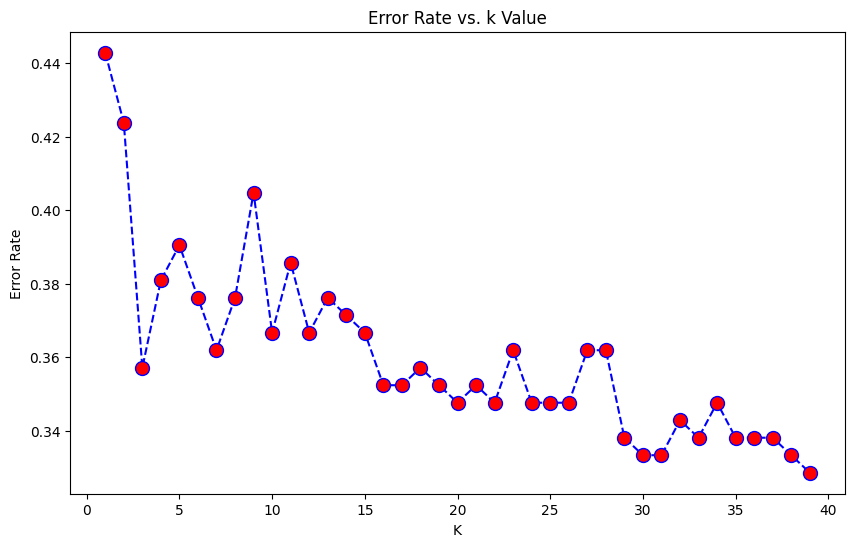

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('WITH k=31')
print('\n')
print(classification_report(y_test,pred3))
accuracy4=accuracy_score(y_test,pred3)

WITH k=31


              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.63      0.65      0.64        95
           2       0.06      0.08      0.06        13
           3       0.58      0.57      0.58        93

    accuracy                           0.56       210
   macro avg       0.40      0.35      0.36       210
weighted avg       0.56      0.56      0.56       210



In [ ]:
accuracydata=[['Random_Forest_classifier',accuracy1],['Naive_Bayes_Classifier',accuracy2],['LogisticRegression',accuracy3],['KNN_Classifier',accuracy4]]
accuracy=pd.DataFrame(data=accuracydata,columns=['Classifiers','Accuracy_Score'])
accuracy.sort_values(['Accuracy_Score'],ascending=False)
accuracy

Classifiers  Accuracy_Score
0  Random_Forest_classifier        0.871429
1    Naive_Bayes_Classifier        0.676190
2        LogisticRegression        0.642857
3            KNN_Classifier        0.557143

In [ ]:
import pandas as pd
#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movie/file.tsv',encoding='ISO-8859-1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get the data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
  
path = '/content/drive/My Drive/Colab Notebooks/movie/file.tsv'
  
df = pd.read_csv(path, sep='\t', names=column_names)
  
# Check the head of the data
df.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [ ]:
# Check out all the movies and their respective IDs
movie_titles = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movie/Movie_Id_Titles.csv')
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [ ]:

data = pd.merge(df, movie_titles, on='item_id')
data.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [ ]:
# Calculate mean rating of all movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [ ]:
 #Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [ ]:
# creating dataframe with 'rating' count values
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
  
ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

<Axes: >

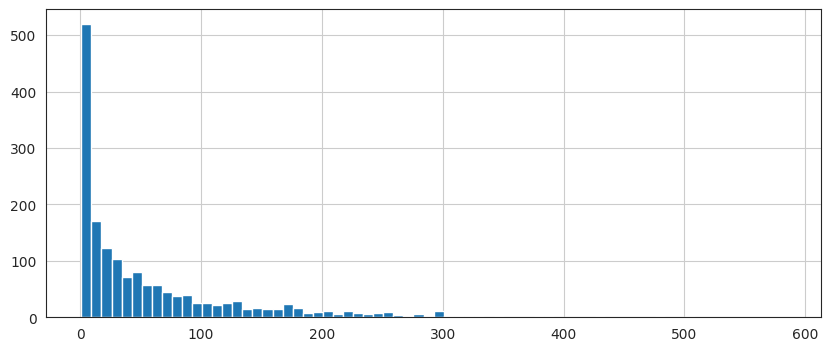

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
  
sns.set_style('white')
%matplotlib inline
 

# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))
  
ratings['num of ratings'].hist(bins = 70)

<Axes: >

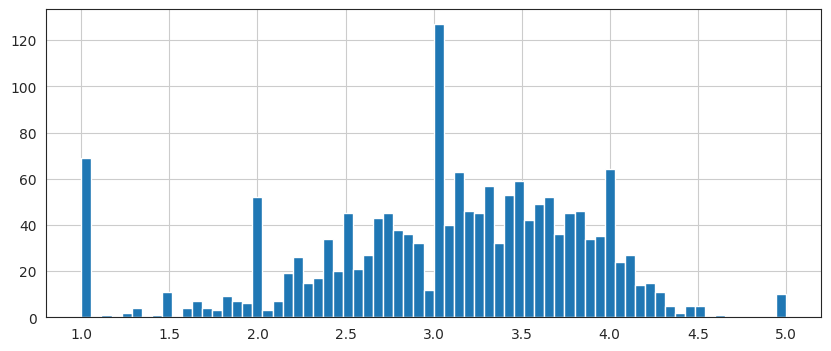

In [ ]:
# plot graph of 'ratings' column
plt.figure(figsize =(10, 4))
  
ratings['rating'].hist(bins = 70)

In [ ]:
# Sorting values according to 
# the 'num of rating column'
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')
  
moviemat.head()
  
ratings.sort_values('num of ratings', ascending = False).head(10)

rating  num of ratings
title                                                  
Star Wars (1977)               4.359589             584
Contact (1997)                 3.803536             509
Fargo (1996)                   4.155512             508
Return of the Jedi (1983)      4.007890             507
Liar Liar (1997)               3.156701             485
English Patient, The (1996)    3.656965             481
Scream (1996)                  3.441423             478
Toy Story (1995)               3.878319             452
Air Force One (1997)           3.631090             431
Independence Day (ID4) (1996)  3.438228             429

In [ ]:

# analysing correlation with similar movies
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']
  
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [ ]:

# analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)
  
corr_starwars.head()

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [ ]:
# Similar movies like starwars
corr_starwars.sort_values('Correlation', ascending = False).head(10)
corr_starwars = corr_starwars.join(ratings['num of ratings'])
  
corr_starwars.head()
  
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130

In [ ]:
# Similar movies as of liarliar
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)
  
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

Correlation  num of ratings
title                                             
Liar Liar (1997)          1.000000             485
Batman Forever (1995)     0.516968             114
Mask, The (1994)          0.484650             129
Down Periscope (1996)     0.472681             101
Con Air (1997)            0.469828             137

In [ ]:
import numpy as np
import scipy.stats
import scipy.spatial
#from sklearn.cross_validation import KFold
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
import warnings
import sys
#from sklearn.utils.extmath import np.dot

#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/movie/oldmoviedataset.csv',encoding='ISO-8859-1')

warnings.simplefilter("error")

users = 6040
items = 3952

def readingFile(filename):

	data = []
	for row in data1:
		r = row.split(',')
		e = [int(r[0])]
		data.append(e)
	return data

def similarity_item(data):

	#f_i_d = open("sim_item_based.txt","w")
	item_similarity_cosine = np.zeros((items,items))
	item_similarity_jaccard = np.zeros((items,items))
	item_similarity_pearson = np.zeros((items,items))
	for item1 in range(items):
		print(item1)
		for item2 in range(items):
			if np.count_nonzero(data[:,item1]) and np.count_nonzero(data[:,item2]):
				item_similarity_cosine[item1][item2] = 1-scipy.spatial.distance.cosine(data[:,item1],data[:,item2])
				item_similarity_jaccard[item1][item2] = 1-scipy.spatial.distance.jaccard(data[:,item1],data[:,item2])
				try:
					if not math.isnan(scipy.stats.pearsonr(data[:,item1],data[:,item2])[0]):
						item_similarity_pearson[item1][item2] = scipy.stats.pearsonr(data[:,item1],data[:,item2])[0]
					else:
						item_similarity_pearson[item1][item2] = 0
				except:
					item_similarity_pearson[item1][item2] = 0

			#f_i_d.write(str(item1) + "," + str(item2) + "," + str(item_similarity_cosine[item1][item2]) + "," + str(item_similarity_jaccard[item1][item2]) + "," + str(item_similarity_pearson[item1][item2]) + "\n")
	#f_i_d.close()
	return item_similarity_cosine, item_similarity_jaccard, item_similarity_pearson

def crossValidation(data):
	k_fold = KFold(n=len(data), n_folds=10)

	Mat = np.zeros((users,items))
	for e in data:
		Mat[e[0]-1][e[1]-1] = e[2]

	sim_item_cosine, sim_item_jaccard, sim_item_pearson = similarity_item(Mat)
	#sim_item_cosine, sim_item_jaccard, sim_item_pearson = np.random.rand(items,items), np.random.rand(items,items), np.random.rand(items,items) 

	'''sim_item_cosine = np.zeros((items,items))
	sim_item_jaccard = np.zeros((items,items))
	sim_item_pearson = np.zeros((items,items))

	f_sim_i = open("sim_item_based.txt", "r")
	for row in f_sim_i:
		r = row.strip().split(',')
		sim_item_cosine[int(r[0])][int(r[1])] = float(r[2])
		sim_item_jaccard[int(r[0])][int(r[1])] = float(r[3])
		sim_item_pearson[int(r[0])][int(r[1])] = float(r[4])
	f_sim_i.close()'''

	rmse_cosine = []
	rmse_jaccard = []
	rmse_pearson = []

	for train_indices, test_indices in k_fold:
		train = [data[i] for i in train_indices]
		test = [data[i] for i in test_indices]

		M = np.zeros((users,items))

		for e in train:
			M[e[0]-1][e[1]-1] = e[2]

		true_rate = []
		pred_rate_cosine = []
		pred_rate_jaccard = []
		pred_rate_pearson = []

		for e in test:
			user = e[0]
			item = e[1]
			true_rate.append(e[2])

			pred_cosine = 3.0
			pred_jaccard = 3.0
			pred_pearson = 3.0

			#item-based
			if np.count_nonzero(M[:,item-1]):
				sim_cosine = sim_item_cosine[item-1]
				sim_jaccard = sim_item_jaccard[item-1]
				sim_pearson = sim_item_pearson[item-1]
				ind = (M[user-1] > 0)
				#ind[item-1] = False
				normal_cosine = np.sum(np.absolute(sim_cosine[ind]))
				normal_jaccard = np.sum(np.absolute(sim_jaccard[ind]))
				normal_pearson = np.sum(np.absolute(sim_pearson[ind]))
				if normal_cosine > 0:
					pred_cosine = np.dot(sim_cosine,M[user-1])/normal_cosine

				if normal_jaccard > 0:
					pred_jaccard = np.dot(sim_jaccard,M[user-1])/normal_jaccard

				if normal_pearson > 0:
					pred_pearson = np.dot(sim_pearson,M[user-1])/normal_pearson

			if pred_cosine < 0:
				pred_cosine = 0

			if pred_cosine > 5:
				pred_cosine = 5

			if pred_jaccard < 0:
				pred_jaccard = 0

			if pred_jaccard > 5:
				pred_jaccard = 5

			if pred_pearson < 0:
				pred_pearson = 0

			if pred_pearson > 5:
				pred_pearson = 5

			print(str(user) + "\t" + str(item) + "\t" + str(e[2]) + "\t" + str(pred_cosine) + "\t" + str(pred_jaccard) + "\t" + str(pred_pearson))
			pred_rate_cosine.append(pred_cosine)
			pred_rate_jaccard.append(pred_jaccard)
			pred_rate_pearson.append(pred_pearson)

		rmse_cosine.append(sqrt(mean_squared_error(true_rate, pred_rate_cosine)))
		rmse_jaccard.append(sqrt(mean_squared_error(true_rate, pred_rate_jaccard)))
		rmse_pearson.append(sqrt(mean_squared_error(true_rate, pred_rate_pearson)))

		print(str(sqrt(mean_squared_error(true_rate, pred_rate_cosine))) + "\t" + str(sqrt(mean_squared_error(true_rate, pred_rate_jaccard))) + "\t" + str(sqrt(mean_squared_error(true_rate, pred_rate_pearson))))
		#raw_input()

	#print sum(rms) / float(len(rms))
	rmse_cosine = sum(rmse_cosine) / float(len(rmse_cosine))
	rmse_pearson = sum(rmse_pearson) / float(len(rmse_pearson))
	rmse_jaccard = sum(rmse_jaccard) / float(len(rmse_jaccard))

	print( str(rmse_cosine) + "\t" + str(rmse_jaccard) + "\t" + str(rmse_pearson))

	f_rmse = open("rmse_item.txt","w")
	f_rmse.write(str(rmse_cosine) + "\t" + str(rmse_jaccard) + "\t" + str(rmse_pearson) + "\n")

	rmse = [rmse_cosine, rmse_jaccard, rmse_pearson]
	req_sim = rmse.index(min(rmse))

	print(req_sim)
	f_rmse.write(str(req_sim))
	f_rmse.close()

	if req_sim == 0:
		sim_mat_item = sim_item_cosine

	if req_sim == 1:
		sim_mat_item = sim_item_jaccard

	if req_sim == 2:
		sim_mat_item = sim_item_pearson

	#predictRating(Mat, sim_mat_item)
	return Mat, sim_mat_item


def predictRating(recommend_data):

	M, sim_item = crossValidation(recommend_data)

	#f = open("toBeRated.csv","r")
	f = open(sys.argv[2],"r")
	toBeRated = {"user":[], "item":[]}
	for row in f:
		r = row.split(',')	
		toBeRated["item"].append(int(r[1]))
		toBeRated["user"].append(int(r[0]))

	f.close()

	pred_rate = []

	#fw = open('result2.csv','w')
	fw_w = open('result2.csv','w')

	l = len(toBeRated["user"])
	for e in range(l):
		user = toBeRated["user"][e]
		item = toBeRated["item"][e]

		pred = 3.0

		#item-based
		if np.count_nonzero(M[:,item-1]):
			sim = sim_item[item-1]
			ind = (M[user-1] > 0)
			#ind[item-1] = False
			normal = np.sum(np.absolute(sim[ind]))
			if normal > 0:
				pred = np.dot(sim,M[user-1])/normal

		if pred < 0:
			pred = 0

		if pred > 5:
			pred = 5

		pred_rate.append(pred)
		print(str(user) + "," + str(item) + "," + str(pred))
		#fw.write(str(user) + "," + str(item) + "," + str(pred) + "\n")
		fw_w.write(str(pred) + "\n")

	#fw.close()
	fw_w.close()

#recommend_data = readingFile("ratings.csv")
recommend_data = readingFile(sys.argv[1])
#crossValidation(recommend_data)
predictRating(recommend_data)
